<a href="https://colab.research.google.com/github/HinnHabib/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title: Prediction of Product Sales
  - Author: Habib Hinn

## Project Overview




Data Dictionary:
|     |     |
| --- | --- |
| **Variable Name** | **Description** |
| Item\_Identifier | Product ID |
| Item\_Weight | Weight of product |
| Item\_Fat\_Content | Whether the product is low-fat or regular |
| Item\_Visibility | The percentage of total display area of all products in a store allocated to the particular product |
| Item\_Type | The category to which the product belongs |
| Item\_MRP | Maximum Retail Price (list price) of the product |
| Outlet\_Identifier | Store ID |
| Outlet\_Establishment\_Year | The year in which store was established |
| Outlet\_Size | The size of the store in terms of ground area covered |
| Outlet\_Location\_Type | The type of area in which the store is located |
| Outlet\_Type | Whether the outlet is a grocery store or some sort of supermarket |
| Item\_Outlet\_Sales | Sales of the product in the particular store. This is the target variable to be predicted|

## Load and Inspect Data

In [164]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [165]:
import pandas as pd
import numpy as np

In [227]:
file_path = '/content/drive/MyDrive/AXSOSACADEMY/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'
df = pd.read_csv(file_path)
df_copy = df.copy()
df2 = df.copy()

1) How many rows and columns?
  - Rows: 8523
  - Columns: 12

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [168]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [169]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


2) What are the datatypes of each variable?

In [170]:
df.dtypes

,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


## Clean Data

In [171]:
num_cols = df.select_dtypes(include='number').columns
for col in num_cols:
  print(f"Column Name: {col} \n")
  print(df[col].value_counts())
  print("\n")

Column Name: Item_Weight 

Item_Weight
12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
8.920      2
6.520      1
9.420      1
7.685      1
5.400      1
Name: count, Length: 415, dtype: int64


Column Name: Item_Visibility 

Item_Visibility
0.000000    526
0.076975      3
0.061271      2
0.046825      2
0.112399      2
           ... 
0.054142      1
0.018920      1
0.044974      1
0.103611      1
0.083060      1
Name: count, Length: 7880, dtype: int64


Column Name: Item_MRP 

Item_MRP
172.0422    7
170.5422    6
142.0154    6
109.5228    6
188.1872    6
           ..
108.7912    1
157.5972    1
245.2118    1
232.3326    1
39.6164     1
Name: count, Length: 5938, dtype: int64


Column Name: Outlet_Establishment_Year 

Outlet_Establishment_Year
1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: count, dtype: int64


Column Name: Item_Outlet_Sales 

Item_Outlet_Sales
958.7520     17
1342

In [172]:
col_object_types = df.select_dtypes(include='object').columns
print(col_object_types)
for col in col_object_types:
  print(f"Column Name: {col} \n")
  print(df[col].value_counts())
  print("\n")

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')
Column Name: Item_Identifier 

Item_Identifier
FDW13    10
FDG33    10
FDX31     9
FDT07     9
NCY18     9
         ..
FDO33     1
FDK57     1
FDT35     1
FDN52     1
FDE52     1
Name: count, Length: 1559, dtype: int64


Column Name: Item_Fat_Content 

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64


Column Name: Item_Type 

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Bre

3) Are there duplicates? If so, drop any duplicates.

In [173]:
duplicate_rows = df.duplicated(keep=False)
if duplicate_rows.sum() > 0:
  df = df.drop_duplicates()
else:
  print("No Duplicates")

No Duplicates


4) Identify missing values.

In [174]:
null_sums = df.isna().sum()
null_percent = null_sums/len(df) * 100
null_percent[null_percent>0].sort_values(ascending=False)

,0
Outlet_Size,28.276428
Item_Weight,17.165317


5) Address the missing values by using a placeholder value.

In [175]:
df['Outlet_Size'].head()
df['Outlet_Size'].value_counts(dropna=False)

,count
Outlet_Size,
Medium,2793
NaN,2410
Small,2388
High,932


In [176]:
df['Outlet_Size'] = df['Outlet_Size'].fillna('MISSING')
df['Outlet_Size'].value_counts(dropna=False)

,count
Outlet_Size,
Medium,2793
MISSING,2410
Small,2388
High,932


In [177]:
df['Item_Weight'].head()
df['Item_Weight'].value_counts(dropna=False)

,count
Item_Weight,
NaN,1463
12.150,86
17.600,82
13.650,77
11.800,76
...,...
5.210,2
9.420,1
7.685,1


In [178]:
null_items_weight = df['Item_Weight'].isna()
df[null_items_weight]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [179]:
df_item_weight = df.groupby('Item_Type')['Item_Weight'].mean()
df_item_weight


,Item_Weight
Item_Type,
Baking Goods,12.277108
Breads,11.346936
Breakfast,12.768202
Canned,12.305705
Dairy,13.426069
Frozen Foods,12.867061
Fruits and Vegetables,13.224769
Hard Drinks,11.400328
Health and Hygiene,13.142314


In [180]:

df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Type'].map(df_item_weight))
df['Item_Weight'].isna().sum()

np.int64(0)

6) Confirm that there are no missing values after addressing them.

In [181]:
null_sums = df.isna().sum()
null_percent = null_sums/len(df) * 100
null_percent

,0
Item_Identifier,0.0
Item_Weight,0.0
Item_Fat_Content,0.0
Item_Visibility,0.0
Item_Type,0.0
Item_MRP,0.0
Outlet_Identifier,0.0
Outlet_Establishment_Year,0.0
Outlet_Size,0.0
Outlet_Location_Type,0.0


7) Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).

In [182]:
col_object_types = df.select_dtypes(include='object').columns
print(col_object_types)
for col in col_object_types:
  print(f"Column Name: {col} \n")
  print(df[col].value_counts())
  print("\n")

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')
Column Name: Item_Identifier 

Item_Identifier
FDW13    10
FDG33    10
FDX31     9
FDT07     9
NCY18     9
         ..
FDO33     1
FDK57     1
FDT35     1
FDN52     1
FDE52     1
Name: count, Length: 1559, dtype: int64


Column Name: Item_Fat_Content 

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64


Column Name: Item_Type 

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Bre

In [183]:
df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [184]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})
df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


8) For any numerical columns, obtain the summary statistics of each (min, max, mean).

In [185]:
num_cols = df.select_dtypes(include='number').columns
df[num_cols].describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857890,0.066132,140.992782,1997.831867,2181.288914
std,4.232804,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.867061,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Exploratory Data Analysis

Import needed Libraries

In [186]:
import matplotlib.pyplot as plt
import seaborn as sns

In [187]:
df.dtypes

,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


In [188]:
sales_stats = df.describe()
sales_stats

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857890,0.066132,140.992782,1997.831867,2181.288914
std,4.232804,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.867061,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### Histogram for Numerical values

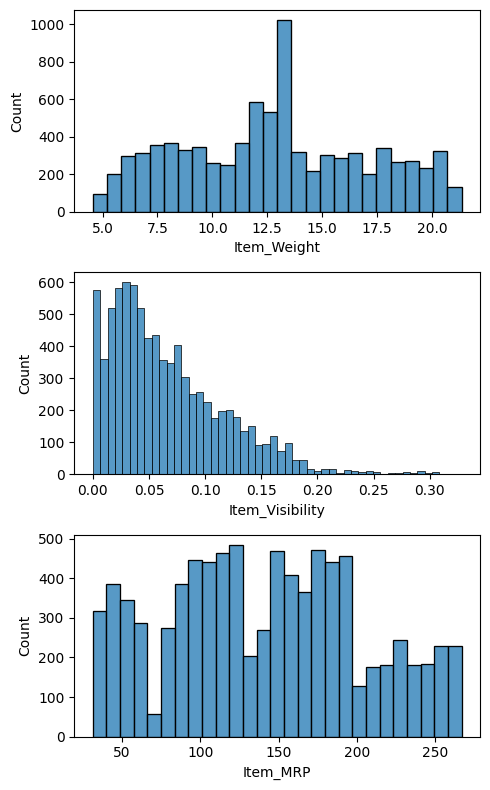

In [189]:
fig, ax = plt.subplots(figsize=(5, 8), nrows=3)
sns.histplot(data=df, x='Item_Weight', ax=ax[0])
sns.histplot(data=df, x='Item_Visibility', ax=ax[1])
sns.histplot(data=df, x='Item_MRP', ax=ax[2])

fig.tight_layout()


#### Historgram Findings:
Item Weight:
- Since most of the data where around missing and we replace it with mean for each - thats why majority of the data is around the mean
-

Item Visibility:
- Most of the item visibility is less than 0.75
- Very few items has visibility larger than 0.20

Item MRP:
- Distrubution doesn't follow the normal distrubution
- There is a drop in values between 130 and 140


### Boxplots to view statistical summaries of numerical features in your dataset.

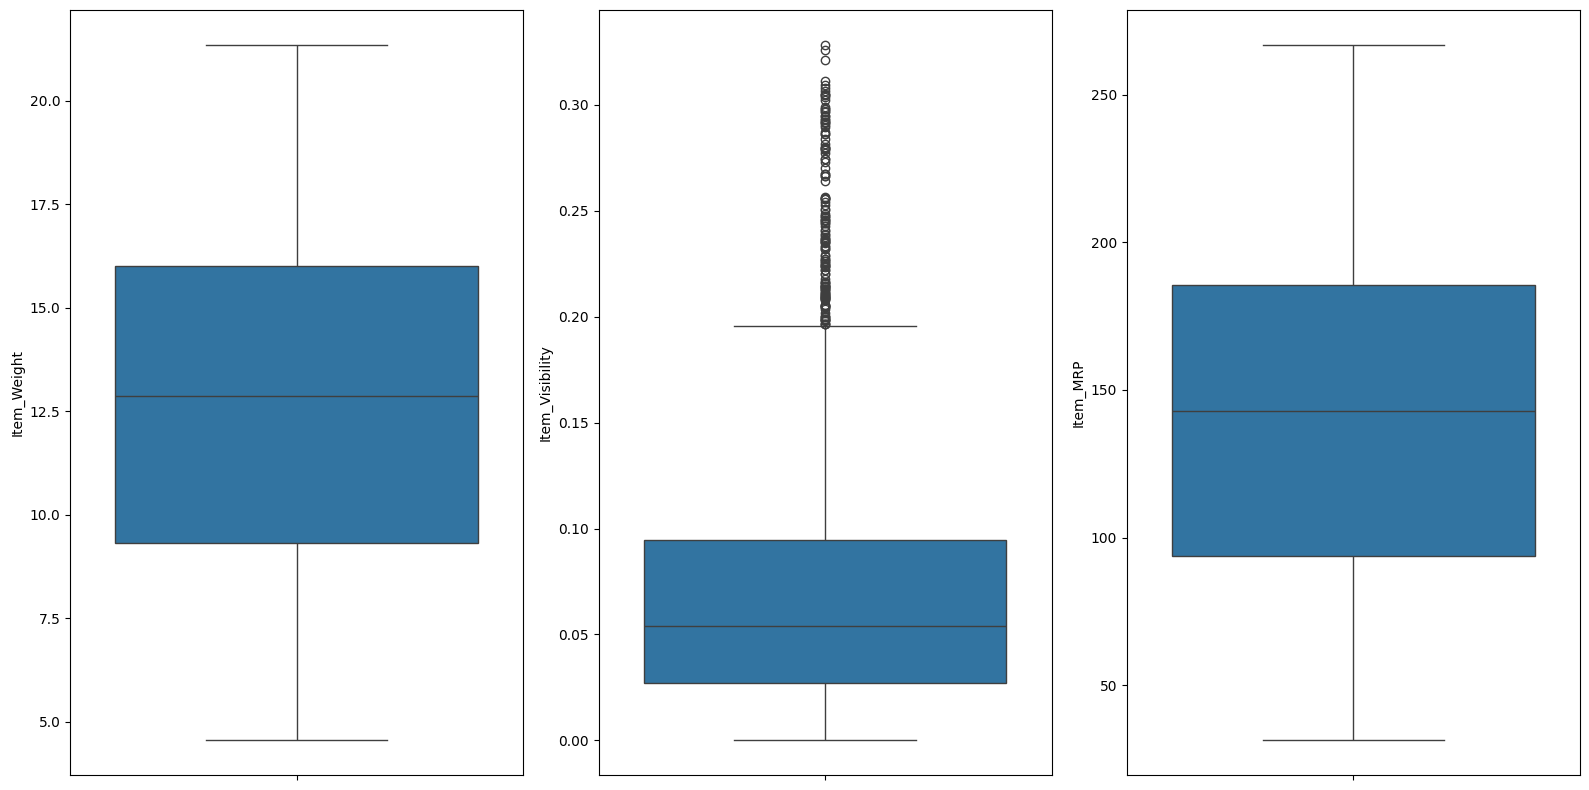

In [190]:
fig, ax = plt.subplots(figsize=(16, 8), ncols=3)
sns.boxplot(data=df, y='Item_Weight', ax=ax[0])
sns.boxplot(data=df, y='Item_Visibility', ax=ax[1])
sns.boxplot(data=df, y='Item_MRP', ax=ax[2])

fig.tight_layout()

#### Box Plot Findings:
Item Weight:
- No outliers
- Average is 13

Item Visibility:
- Lot of Outliers
- Average above 0.05 with slight value.


Item MRP:
- No outliers
- Average below 150
- Min around 30\$
- Max around 280\$


#### Countplots to view the frequency of each class of categorial features

/tmp/ipython-input-1807187081.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)


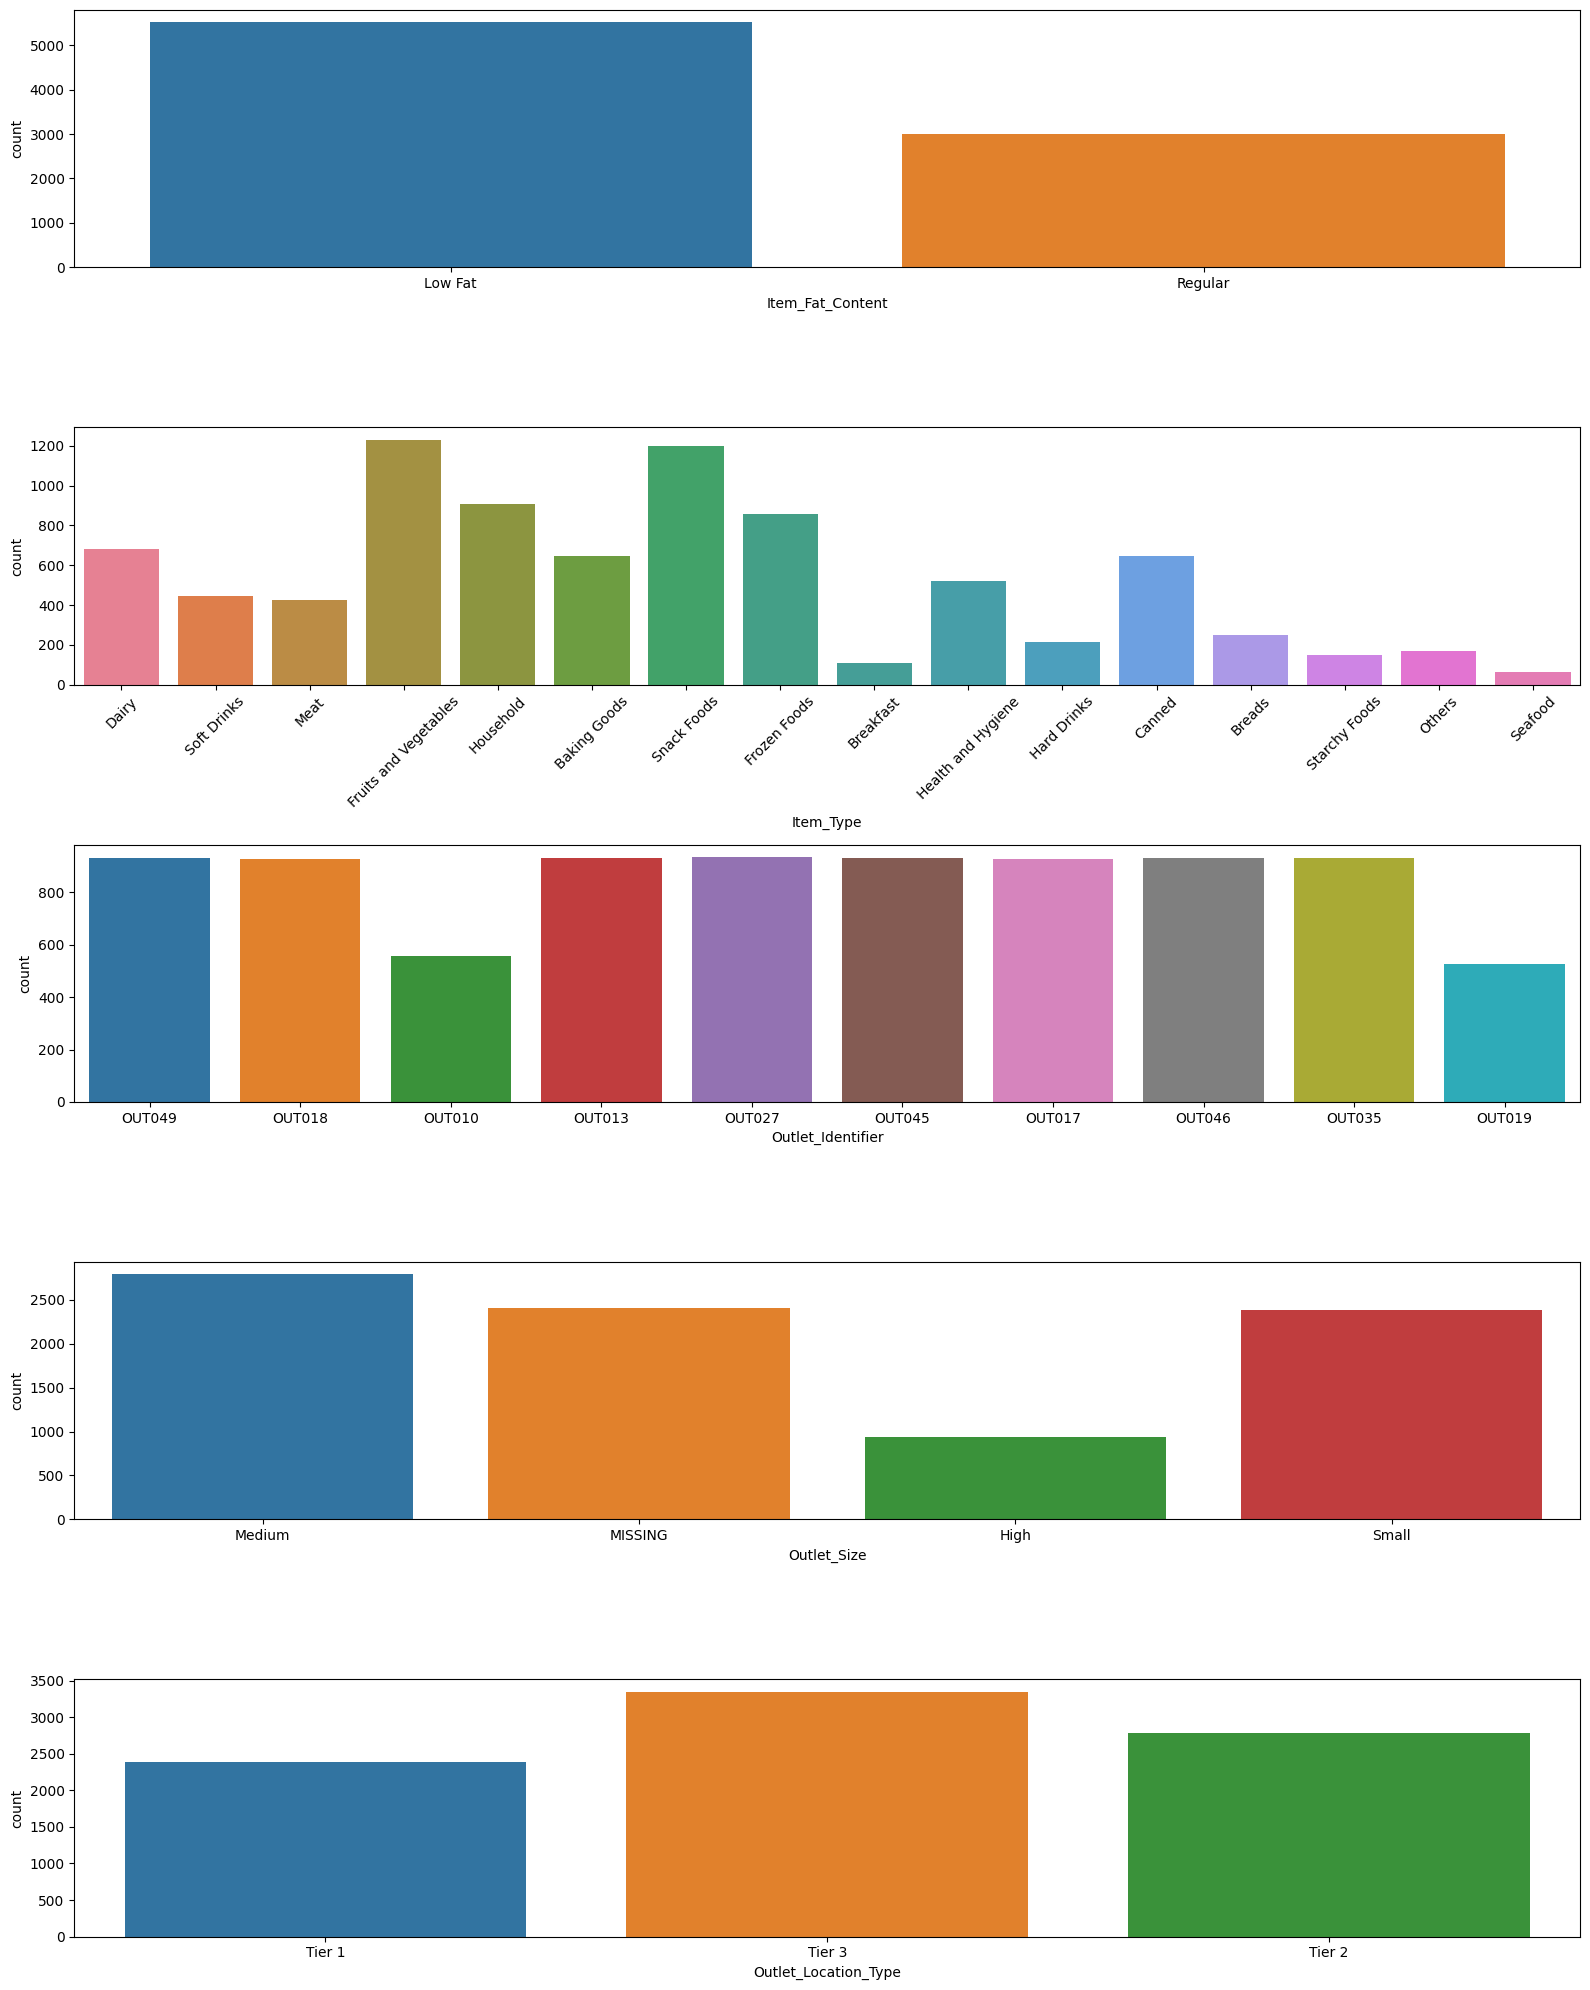

In [191]:
fig, ax = plt.subplots(figsize=(16, 20), nrows=5)
sns.countplot(data=df, x='Item_Fat_Content', ax=ax[0], hue='Item_Fat_Content' )
sns.countplot(data=df, x='Item_Type', ax=ax[1], hue='Item_Type')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)
sns.countplot(data=df, x='Outlet_Identifier', ax=ax[2], hue='Outlet_Identifier')
sns.countplot(data=df, x='Outlet_Size', ax=ax[3], hue='Outlet_Size')
sns.countplot(data=df, x='Outlet_Location_Type', ax=ax[4], hue='Outlet_Location_Type')

fig.tight_layout()

#### Count Plot Findings:

Item Fat Content:
- Majority of items sold are law fat
- Law fat count is double the regulator

Item Type:
- Majority of items are fruits and vegetables and snack foods
- Very few breakfast and seafood items available


Outlet Identifier:
- Most of the Outlets have same values expect outlet OUT010 and OUT019

Outlet Size:
- Medium Sized Outlets has highest value
- Hig Sized Outlets has lowest value
- Missing Sized has almost same value as Small Sized Outlet


Outlet Location Type:
- Tier 3 has the highest value then Tier 1 then Tier 2

#### Heatmap to view the correlation between features.

In [192]:
corr = df.corr(numeric_only=True)
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.011620,0.025821,-0.008376,0.012088
Item_Visibility,-0.011620,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.025821,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008376,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.012088,-0.128625,0.567574,-0.049135,1.000000


<Axes: >

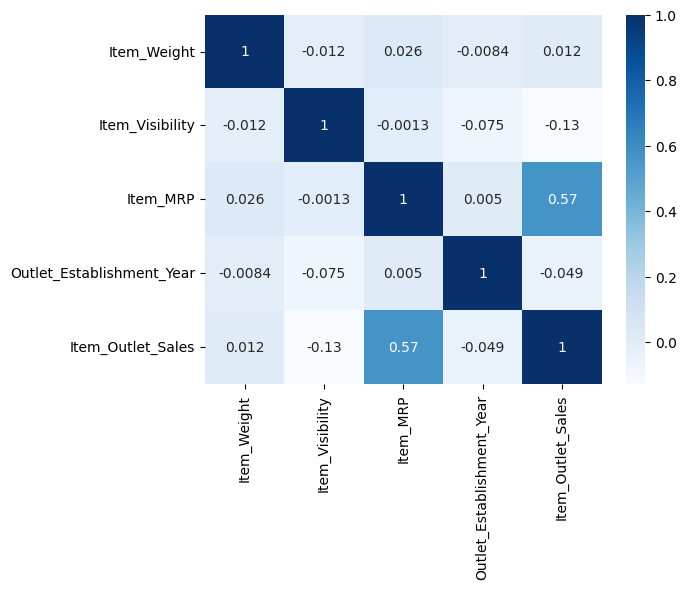

In [193]:
sns.heatmap(data=corr, annot=True, cmap = 'Blues')

Heatmap Findinds:
- There is a moderate positive correlation between Item MRP and item outlet sales (0.57)

## Feature Inspection

In [194]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### FDA Functions

In [195]:
# Basic imports for functions
import matplotlib.pyplot as plt
import seaborn as sns

# UNIVARIATE PLOTTING FUNCTIONS FOR EDA
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")

  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100

  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax


def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes


In [196]:
"""MULTIVARIATE PLOTTING FUNCTIONS VS. NUMERIC TARGET"""

def plot_categorical_vs_target(df, x, y='Item_Outlet_Sales',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  """Plots a combination of a seaborn barplot of means combined with
  a seaborn stripplot to show the spread of the data.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax


def plot_numeric_vs_target(df, x, y='Item_Outlet_Sales',
                           figsize=(6,4)):
  """Plots a seaborn regplot with Pearson's correlation (r) added
  to the title.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax

### Feature Item_Weight

In [197]:
# Confirming the dtype to select correct EDA function
feature = "Item_Weight"
df_copy[feature].dtype

dtype('float64')

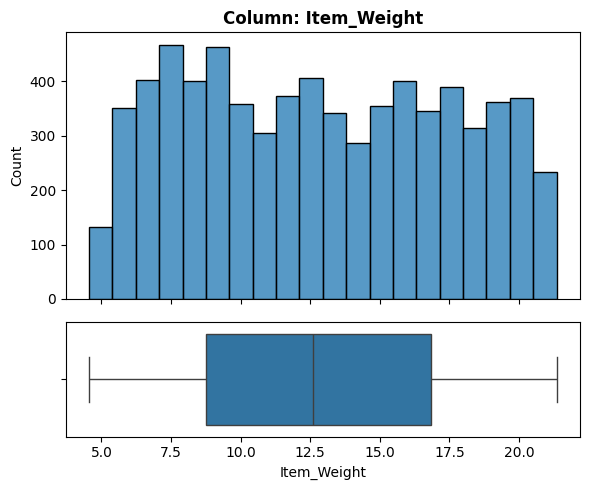

- NaN's Found: 1463 (17.17%)
- Unique Values: 415
- Most common value: 'nan' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [198]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df_copy, feature);

##### Feature Observations

What type of feature is it? (Categorical (nominal), ordinal, numeric)
- Numeric

How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
- 1463 (17.17%)
- impute with a placeholder value

Is the feature constant or quasi-constant?
- No

What is the cardinality? Is it high?
- Numeric feature

Would we know this BEFORE the target is determined?
- Yes

Is there a business case/understanding reason to exclude based on our business case?
- No

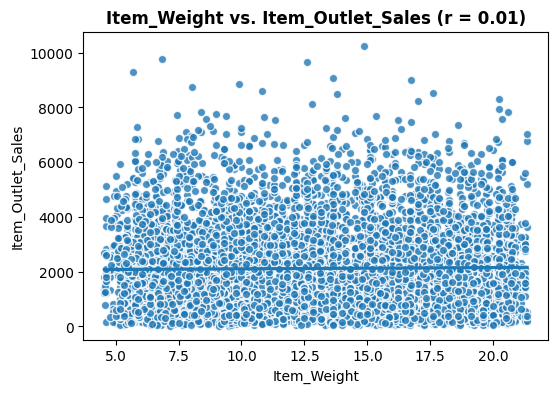

In [199]:
plot_numeric_vs_target(df_copy, feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - No
  - Does this feature appear to be a predictor of the target?
    - No. there is no correlation between Item Weight and the target.

___

### Feature Item_Visibility

In [200]:
# Confirming the dtype to select correct EDA function
feature = "Item_Visibility"
df_copy[feature].dtype

dtype('float64')

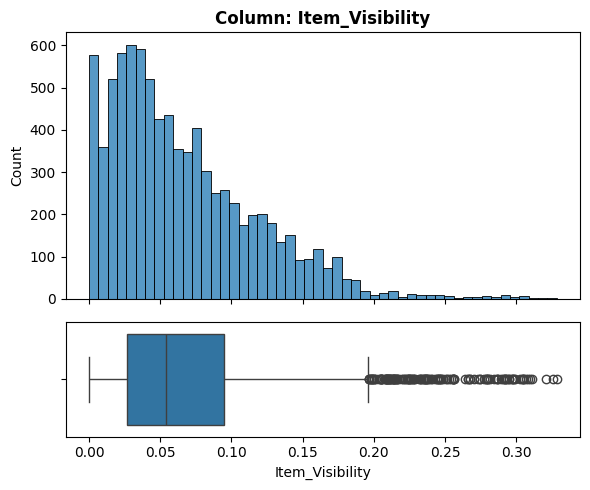

- NaN's Found: 0 (0.0%)
- Unique Values: 7880
- Most common value: '0.0' occurs 526 times (6.17%)
- Not constant or quasi-constant.


In [201]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df_copy, feature);

##### Feature Observations

What type of feature is it? (Categorical (nominal), ordinal, numeric)
- Numeric

How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
- No Missing values

Is the feature constant or quasi-constant?
- No

What is the cardinality? Is it high?
- Numeric feature

Would we know this BEFORE the target is determined?
- Yes

Is there a business case/understanding reason to exclude based on our business case?
- No

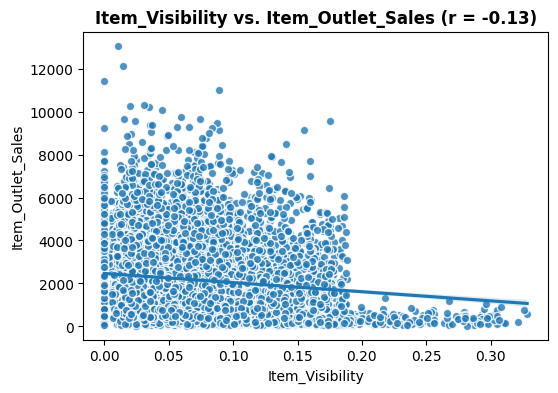

In [202]:
plot_numeric_vs_target(df_copy, feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes
  - Does this feature appear to be a predictor of the target?
    - Yes. When visibility increase sales decrease. (Unexpected)

___

### Feature Item_MRP

In [203]:
# Confirming the dtype to select correct EDA function
feature = "Item_MRP"
df_copy[feature].dtype

dtype('float64')

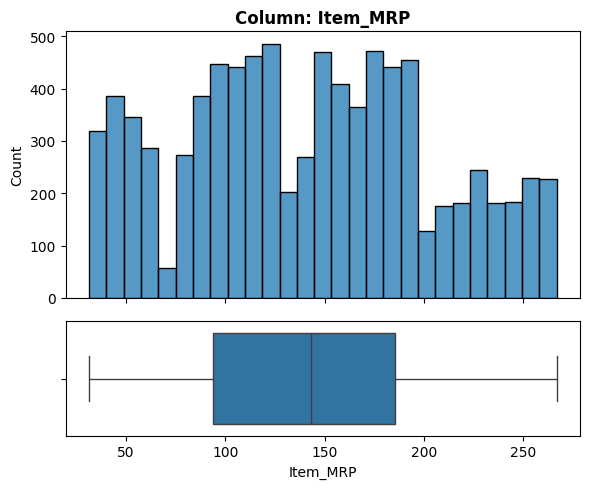

- NaN's Found: 0 (0.0%)
- Unique Values: 5938
- Most common value: '172.0422' occurs 7 times (0.08%)
- Not constant or quasi-constant.


In [204]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df_copy, feature);

##### Feature Observations

What type of feature is it? (Categorical (nominal), ordinal, numeric)
- Numeric

How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
- No Missing values

Is the feature constant or quasi-constant?
- No

What is the cardinality? Is it high?
- Numeric feature

Would we know this BEFORE the target is determined?
- Yes

Is there a business case/understanding reason to exclude based on our business case?
- No

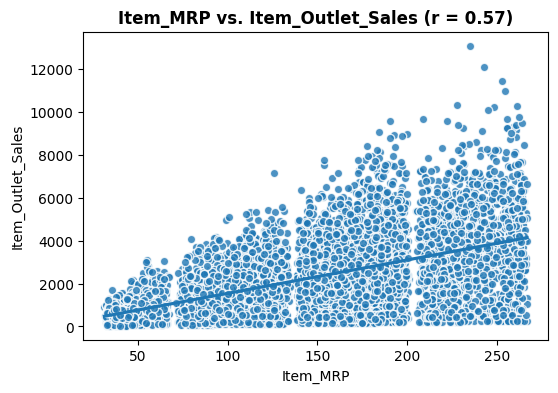

In [205]:
plot_numeric_vs_target(df_copy, feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes
  - Does this feature appear to be a predictor of the target?
    - Yes. moderate positive correlation

___

### Feature Outlet_Establishment_Year

In [206]:
# Confirming the dtype to select correct EDA function
feature = "Outlet_Establishment_Year"
df_copy[feature].dtype

dtype('int64')

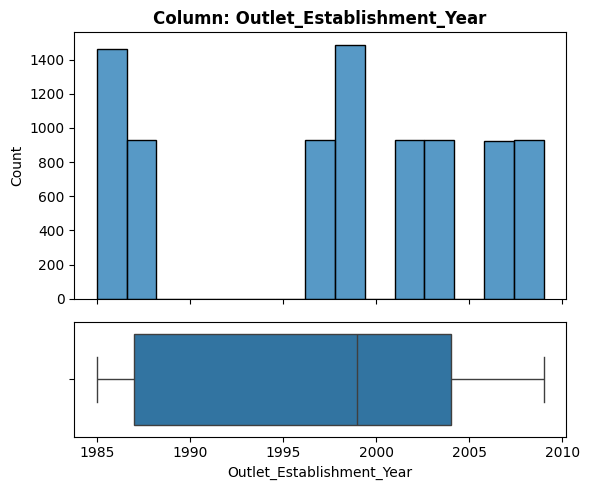

- NaN's Found: 0 (0.0%)
- Unique Values: 9
- Most common value: '1985' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [207]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df_copy, feature);

##### Feature Observations

What type of feature is it? (Categorical (nominal), ordinal, numeric)
- Numeric

How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
- No Missing values

Is the feature constant or quasi-constant?
- No

What is the cardinality? Is it high?
- Numeric feature

Would we know this BEFORE the target is determined?
- Yes

Is there a business case/understanding reason to exclude based on our business case?
- No

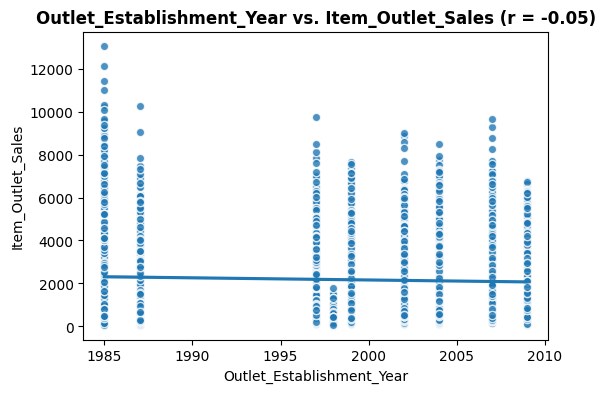

In [208]:
plot_numeric_vs_target(df_copy, feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - No
  - Does this feature appear to be a predictor of the target?
    - No, no correlation between the 2.

___

### Feature Item_Fat_Content

In [209]:
# Confirming the dtype to select correct EDA function
feature = "Item_Fat_Content"
df[feature].dtype

dtype('O')

/tmp/ipython-input-1410303983.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


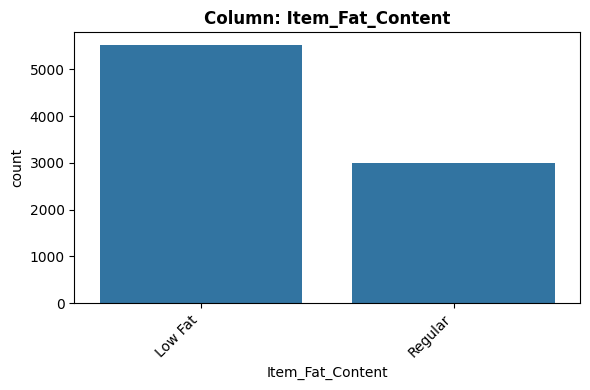

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Low Fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant.


In [210]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df, feature);

##### Feature Observations

What type of feature is it? (Categorical (nominal), ordinal, numeric)
- Categorical

How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
- No Missing values

Is the feature constant or quasi-constant?
- No

What is the cardinality? Is it high?
- Low cardinality

Would we know this BEFORE the target is determined?
- Yes

Is there a business case/understanding reason to exclude based on our business case?
- No

/tmp/ipython-input-1387488076.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


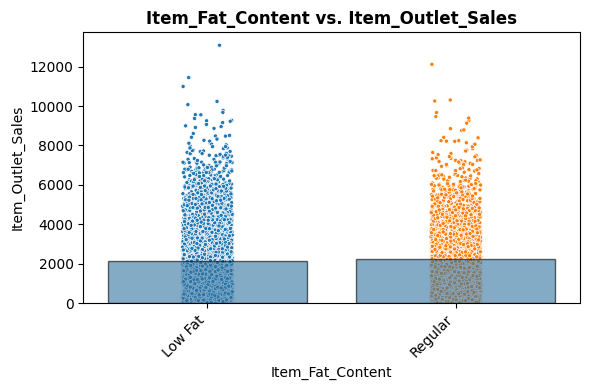

In [211]:
plot_categorical_vs_target(df, feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes
  - Does this feature appear to be a predictor of the target?
    - Yes as values are spread quite evenly across the 2 categories

___

### Feature Item_Type

In [212]:
# Confirming the dtype to select correct EDA function
feature = "Item_Type"
df_copy[feature].dtype

dtype('O')

/tmp/ipython-input-1410303983.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


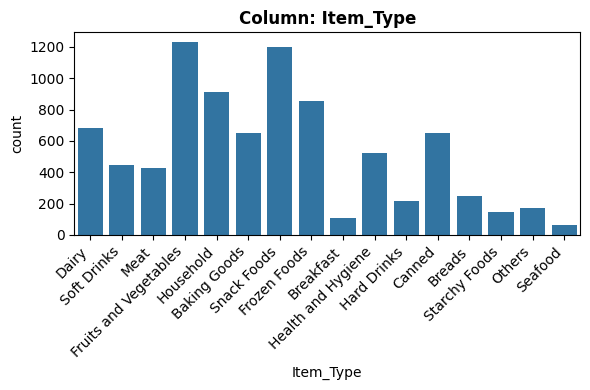

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


In [213]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df_copy, feature);

##### Feature Observations

What type of feature is it? (Categorical (nominal), ordinal, numeric)
- Categorical

How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
- No Missing values

Is the feature constant or quasi-constant?
- No

What is the cardinality? Is it high?
- High cardinality

Would we know this BEFORE the target is determined?
- Yes

Is there a business case/understanding reason to exclude based on our business case?
- No

/tmp/ipython-input-1387488076.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


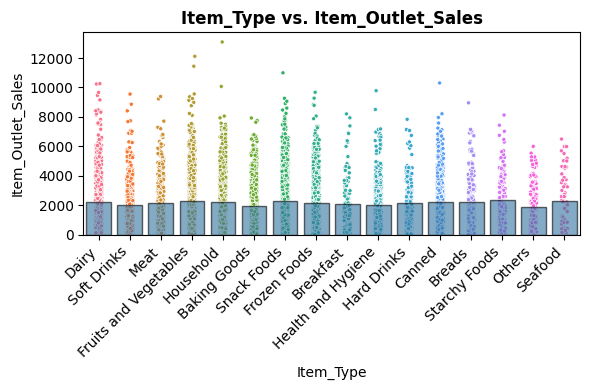

In [214]:
plot_categorical_vs_target(df_copy, feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes
  - Does this feature appear to be a predictor of the target?
    - Yes. all categories have sales

___

### Feature Outlet_Identifier

In [215]:
# Confirming the dtype to select correct EDA function
feature = "Outlet_Identifier"
df_copy[feature].dtype

dtype('O')

/tmp/ipython-input-1410303983.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


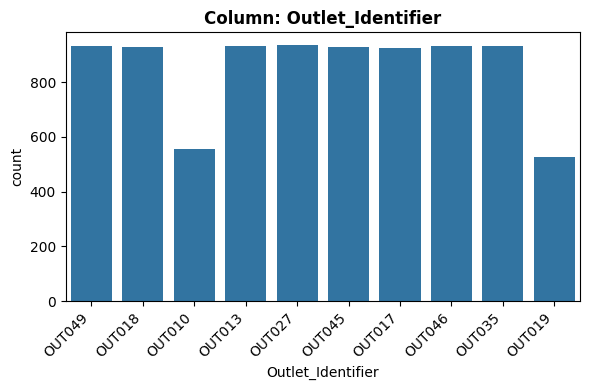

- NaN's Found: 0 (0.0%)
- Unique Values: 10
- Most common value: 'OUT027' occurs 935 times (10.97%)
- Not constant or quasi-constant.


In [216]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df, feature);

##### Feature Observations

What type of feature is it? (Categorical (nominal), ordinal, numeric)
- Categorical

How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
- No Missing values

Is the feature constant or quasi-constant?
- No

What is the cardinality? Is it high?
- 10 values (High cardinality)

Would we know this BEFORE the target is determined?
- Yes

Is there a business case/understanding reason to exclude based on our business case?
- No

/tmp/ipython-input-1387488076.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


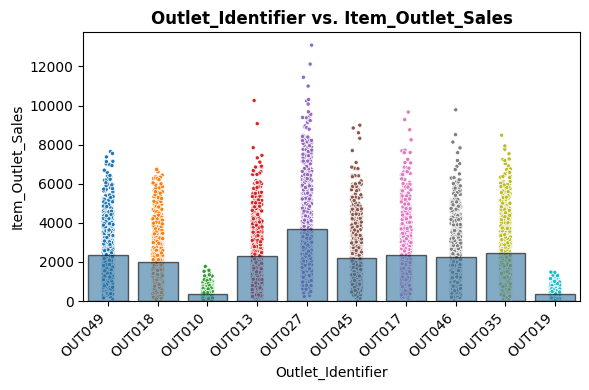

In [217]:
plot_categorical_vs_target(df, feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes
  - Does this feature appear to be a predictor of the target?
    - Yes. different sales for differe outlet identifier

___

### Feature Outlet_Size

In [218]:
# Confirming the dtype to select correct EDA function
feature = "Outlet_Size"
df[feature].dtype

dtype('O')

/tmp/ipython-input-1410303983.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


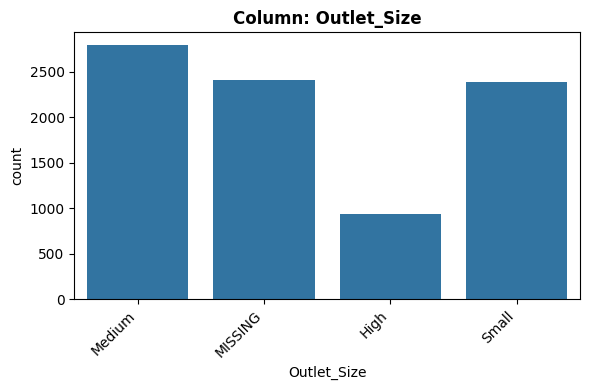

- NaN's Found: 2410 (28.28%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


In [219]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df_copy, feature);

##### Feature Observations

What type of feature is it? (Categorical (nominal), ordinal, numeric)
- ordinal

How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
- 2410 (28.28%)

Is the feature constant or quasi-constant?
- No

What is the cardinality? Is it high?
- Low

Would we know this BEFORE the target is determined?
- Yes

Is there a business case/understanding reason to exclude based on our business case?
- No

/tmp/ipython-input-1387488076.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


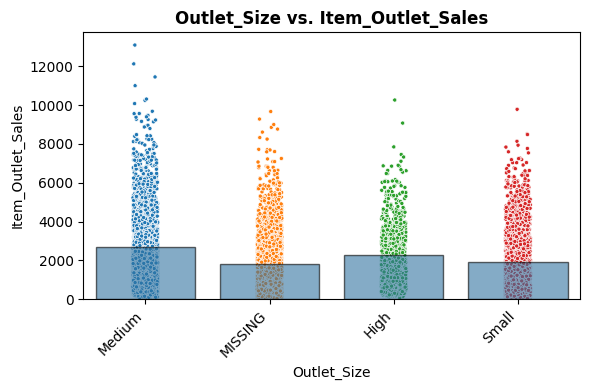

In [220]:
plot_categorical_vs_target(df_copy, feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes
  - Does this feature appear to be a predictor of the target?
    - Yes. there isn't a high diff between values for different categories

___

### Feature Outlet_Location_Type

In [221]:
# Confirming the dtype to select correct EDA function
feature = "Outlet_Location_Type"
df_copy[feature].dtype

dtype('O')

/tmp/ipython-input-1410303983.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


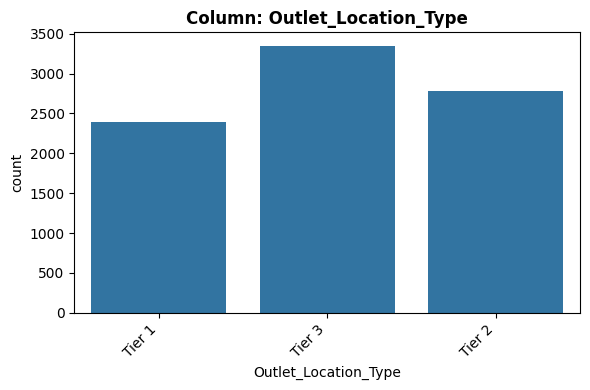

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.


In [222]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df_copy, feature);

##### Feature Observations

What type of feature is it? (Categorical (nominal), ordinal, numeric)
- Categorical (ordinal)

How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
- No Missing values

Is the feature constant or quasi-constant?
- No

What is the cardinality? Is it high?
- 3 values Low

Would we know this BEFORE the target is determined?
- Yes

Is there a business case/understanding reason to exclude based on our business case?
- No

/tmp/ipython-input-1387488076.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


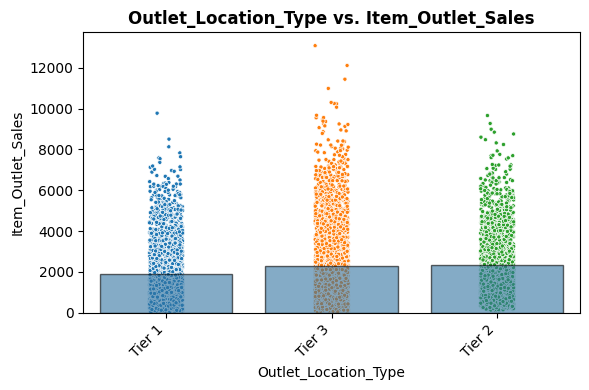

In [223]:
plot_categorical_vs_target(df_copy, feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes
  - Does this feature appear to be a predictor of the target?
    - Yes. Location type for sure will affect sales

___

### Feature Outlet_Type

In [224]:
# Confirming the dtype to select correct EDA function
feature = "Outlet_Type"
df[feature].dtype

dtype('O')

/tmp/ipython-input-1410303983.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


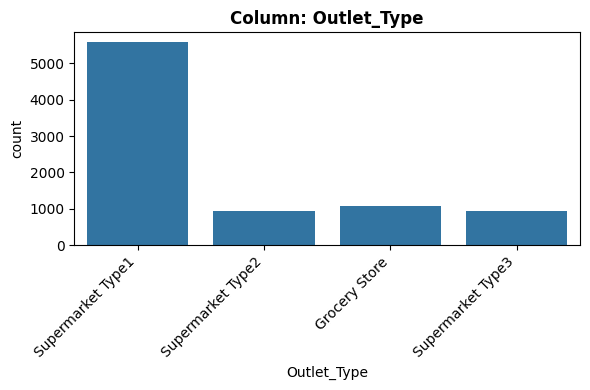

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.


In [225]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df, feature);

##### Feature Observations

What type of feature is it? (Categorical (nominal), ordinal, numeric)
- Categorical (nominal)

How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
- No Missing values

Is the feature constant or quasi-constant?
- No

What is the cardinality? Is it high?
- Low (4 values)

Would we know this BEFORE the target is determined?
- Yes

Is there a business case/understanding reason to exclude based on our business case?
- No

/tmp/ipython-input-1387488076.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


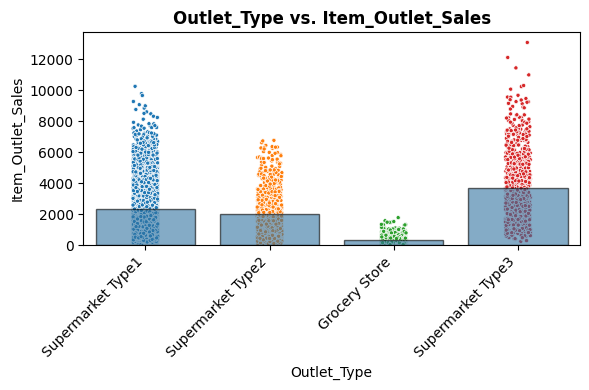

In [226]:
plot_categorical_vs_target(df, feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes
  - Does this feature appear to be a predictor of the target?
    - Yes. different categories has different values

___

## Preprocesing for Machine Learning

In [232]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, ColumnTransformer

from sklearn import set_config
set_config(transform_output='pandas')

In [233]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [234]:
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [235]:
df2.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### Data Checks

#### Duplicates

In [236]:
duplicate_rows = df2.duplicated(keep=False)
if duplicate_rows.sum() > 0:
  df2 = df2.drop_duplicates()
else:
  print("No Duplicates")

No Duplicates


#### N/A

In [237]:
df2.isna().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


#### Inconsistent Categorical

In [238]:
df2['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


In [239]:
df2['Item_Fat_Content'] = df2['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})
df2['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


### Defining X and y

In [240]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#### Dropping Unwanted Columns

In [241]:
# Droping features
df2 = df2.drop(columns=['Item_Identifier', 'Item_Weight', 'Outlet_Establishment_Year',])
df2.head()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380
1,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228
2,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700
3,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,NaN,Tier 3,Grocery Store,732.3800
4,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052


In [242]:
## Define X and y
target = 'Item_Outlet_Sales'

X = df2.drop(columns=target).copy()
y = df2[target].copy()
X.head()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1
1,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2
2,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1
3,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,NaN,Tier 3,Grocery Store
4,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1


#### Does this feature appear

In [243]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

#### Making a Preprocessing Pipeline

In [244]:
# Checking object columns
X_train.select_dtypes('object')

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
4776,Low Fat,Household,OUT018,Medium,Tier 3,Supermarket Type2
7510,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2
5828,Regular,Meat,OUT049,Medium,Tier 1,Supermarket Type1
5327,Low Fat,Baking Goods,OUT035,Small,Tier 2,Supermarket Type1
4810,Low Fat,Frozen Foods,OUT045,NaN,Tier 2,Supermarket Type1
...,...,...,...,...,...,...
5734,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
5191,Low Fat,Frozen Foods,OUT017,NaN,Tier 2,Supermarket Type1
5390,Low Fat,Health and Hygiene,OUT045,NaN,Tier 2,Supermarket Type1
860,Low Fat,Snack Foods,OUT017,NaN,Tier 2,Supermarket Type1


In [247]:
df2['Item_Fat_Content'].value_counts(dropna=False)

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


In [248]:
df2['Item_Type'].value_counts(dropna=False)

,count
Item_Type,
Fruits and Vegetables,1232
Snack Foods,1200
Household,910
Frozen Foods,856
Dairy,682
Canned,649
Baking Goods,648
Health and Hygiene,520
Soft Drinks,445


In [249]:
df2['Outlet_Identifier'].value_counts(dropna=False)

,count
Outlet_Identifier,
OUT027,935
OUT013,932
OUT035,930
OUT049,930
OUT046,930
OUT045,929
OUT018,928
OUT017,926
OUT010,555


In [250]:
df2['Outlet_Size'].value_counts(dropna=False)

,count
Outlet_Size,
Medium,2793
NaN,2410
Small,2388
High,932


In [251]:
df2['Outlet_Location_Type'].value_counts(dropna=False)

,count
Outlet_Location_Type,
Tier 3,3350
Tier 2,2785
Tier 1,2388


In [252]:
df2['Outlet_Type'].value_counts(dropna=False)

,count
Outlet_Type,
Supermarket Type1,5577
Grocery Store,1083
Supermarket Type3,935
Supermarket Type2,928


In [245]:
# Prepare ordinal pipeline
ord_cols = ['Outlet_Size', 'Outlet_Location_Type']

# Impute Most common
impute_common = SimpleImputer(strategy='most_frequent')

# Ordinal Encoder
outlet_size_order = ['Small', 'Medium', 'High']
outlet_location_order = ['Tier 1', 'Tier 2', 'Tier 3']
ord_encoder = OrdinalEncoder(categories=[outlet_size_order, outlet_location_order])

# Scaler
scaler = StandardScaler()

# make a pipeline
ord_pipe = make_pipeline(impute_common, ord_encoder, scaler)
ord_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('ordinalencoder',
                 OrdinalEncoder(categories=[['Small', 'Medium', 'High'],
                                            ['Tier 1', 'Tier 2', 'Tier 3']])),
                ('standardscaler', StandardScaler())])

In [253]:
#Create tuple
ord_tuple = ('ordinal',ord_pipe, ord_cols)
ord_tuple

('ordinal',
 Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                 ('ordinalencoder',
                  OrdinalEncoder(categories=[['Small', 'Medium', 'High'],
                                             ['Tier 1', 'Tier 2', 'Tier 3']])),
                 ('standardscaler', StandardScaler())]),
 ['Outlet_Size', 'Outlet_Location_Type'])

In [255]:
# Prepare Categorical pipeline
cat_cols = X_train.select_dtypes('object').drop(columns=ord_cols).columns

impute_missing = SimpleImputer(strategy='constant',fill_value='MISSING')
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
ohe_pipe = make_pipeline(impute_missing, ohe_encoder)
ohe_pipe

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='MISSING', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [256]:
#Create tuple
ohe_tuple = ('categorical', ohe_pipe, cat_cols)
ohe_tuple

('categorical',
 Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='MISSING', strategy='constant')),
                 ('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False))]),
 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Type'], dtype='object'))

In [257]:
# Prepare numeric piepline
num_cols = X_train.select_dtypes('number').columns
mean_imputer = SimpleImputer(strategy="mean")
scaler = StandardScaler()

#Numeric Pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [258]:
#Create tuple
num_tuple = ('numeric', numeric_pipe, num_cols)
num_tuple

('numeric',
 Pipeline(steps=[('simpleimputer', SimpleImputer()),
                 ('standardscaler', StandardScaler())]),
 Index(['Item_Visibility', 'Item_MRP'], dtype='object'))

In [259]:
col_transformer = ColumnTransformer([num_tuple, ord_tuple, ohe_tuple],
                                    verbose_feature_names_out=False)
col_transformer

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Visibility', 'Item_MRP'], dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Small',
                                                                              'Medium',
                                                                              'High'],
                                                                             ['Tier '
                                                                              '1...
                                                  StandardScaler())]),
                                 ['Outlet_Size', 'Outlet_Location_Type']),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Type'], dtype='object'))],
                  verbose_feature_names_out=False)

In [261]:
col_transformer.fit(X_train)

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Visibility', 'Item_MRP'], dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Small',
                                                                              'Medium',
                                                                              'High'],
                                                                             ['Tier '
                                                                              '1...
                                                  StandardScaler())]),
                                 ['Outlet_Size', 'Outlet_Location_Type']),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Type'], dtype='object'))],
                  verbose_feature_names_out=False)

In [262]:
X_train_processed = col_transformer.transform(X_train)
X_train_processed.head()

,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
4776,-0.712775,1.828109,0.287374,1.084948,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7510,-1.291052,0.603369,0.287374,1.084948,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5828,1.813319,0.244541,0.287374,-1.384777,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5327,-1.004931,-0.952591,-1.384048,-0.149914,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4810,-0.965484,-0.336460,0.287374,-0.149914,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [263]:
X_test_processed = col_transformer.transform(X_test)
X_test_processed.head()

,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
7503,-0.776646,-0.998816,1.958796,1.084948,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2957,0.100317,-1.585194,-1.384048,-1.384777,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7031,-0.482994,-1.595784,0.287374,-1.384777,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1084,-0.415440,0.506592,0.287374,1.084948,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
856,-1.047426,0.886725,-1.384048,-0.149914,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
